In [2]:
#Necessary Libraries 

import matplotlib.pyplot as plt #to plot results
import numpy as np   #useful for arrays and other fun stufff
import pandas as pd   #dataFrame and other useful tools
import seaborn as sns  #used to plot as well and visualize more in depth graphs
import giddy 

/home/matthewdicicco38/.local/lib/python3.9/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")
/home/matthewdicicco38/.local/lib/python3.9/site-packages/libpysal/examples/remotes.py:24: UserWarning: Remote data sets not available. Check connection.
  warnings.warn("Remote data sets not available. Check connection.")


Text(0, 0.5, 'Number of Up and Down Steps')

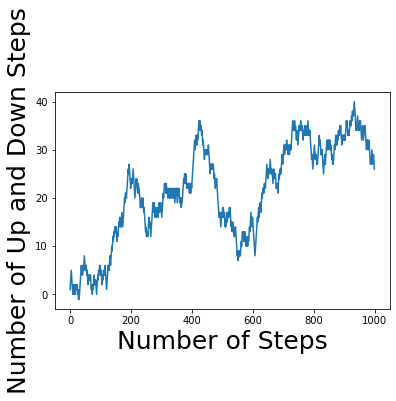

In [3]:
#Random Walk Example

start = 0
val = []
n = 1000  #can modify this vale so that we can see what happens over different spans of time
for i in range(n):
    step = np.random.choice([-1,1],p=[0.5,0.5])
    start = start + step
    val.append(start)
    
plt.plot(val)
plt.xlabel('Number of Steps',fontsize=25)
plt.ylabel(r'Number of Up and Down Steps',fontsize=25)

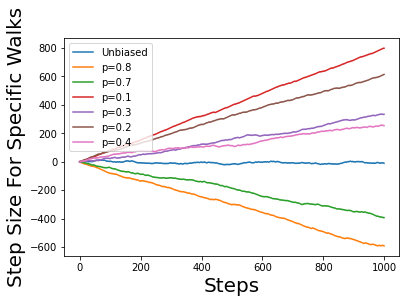

In [4]:
#Biased Random Walk
#These are all some of the possible biased random walks
p = [[0.5,0.5],[0.8,0.2],[0.7,0.3],[0.1,0.9],[0.3,0.7],[0.2,0.8],[0.4,0.6]]
p_s = ['Unbiased','p=0.8','p=0.7','p=0.1','p=0.3','p=0.2','p=0.4']
n = 1000 #can change where 
val = []
for pair in p:
    x_y = []
    start = 0
    for i in range(n):
        step = np.random.choice([-1,1],p=pair)
        start = start + step
        x_y.append(start)
    val.append(x_y)
    
i=0

for x in val:
    plt.plot(x, label = p_s[i])
    i=i+1
plt.xlabel('Steps',fontsize=20)
plt.ylabel('Step Size For Specific Walks',fontsize=20)
plt.legend()

             Count
Final State       
3            50089
5            25139
1            24772


Text(0, 0.5, 'Normalized Count')

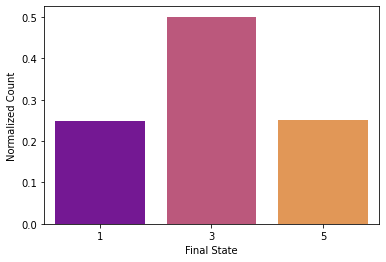

In [5]:
#Gamblers Ruin Problem

def GamblersProblem(start,first,last,n):
    for k in range(n):
            step = np.random.choice([-1,1],p=[0.5,0.5])
            start = start + step
    
    if(start==first):
        return first
    elif(start==last):
        return last
    else:
        return start

state_list = []
for i in range(100000):
    #start in state 3, broke state is 0, winning state is 5, 2 time steps
    state_list.append(GamblersProblem(3,0,5,2))
data_state = pd.DataFrame({'Final State':state_list})
data_occ = pd.DataFrame(data_state.value_counts('Final State')).rename(columns={0:'Count'})
print(data_occ)
data_occ['Count'] = data_occ['Count']/100000
sns.barplot(x=data_occ.index,y=data_occ['Count'],palette='plasma')
plt.ylabel('Normalized Count')

In [6]:
#Markov Chain
#States 1,2,3 are transient
#States 4,5 are recurrent
state_1 = [0.7,0.2,0.1,0,0]
state_2 = [0,0.5,0.5,0,0]
state_3 = [0,0,1,0,0]
state_4 = [0,0,0,0,1]
state_5 = [0,0,0,0.6,0.4]
trans_matrix = [state_1,state_2,state_3,state_4,state_5]
trans_matrix = np.array(trans_matrix)
trans_matrix

array([[0.7, 0.2, 0.1, 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0.6, 0.4]])

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]


Text(0.5, 0, 'Steps')

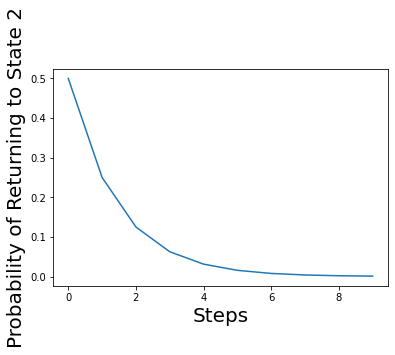

In [7]:
#Evaluating state 2 and what its probability of returning to state 2
#after n iterations is
def t(N):
    step = np.arange(1,N+1,1)
    y = []
    new_matrix=[]
    for s in step:
        v = 0.5**s
        y.append(v)
    print(y)
    return y

plt.plot(t(10))
plt.ylabel('Probability of Returning to State 2',fontsize=20)
plt.xlabel('Steps',fontsize=20)



[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07]


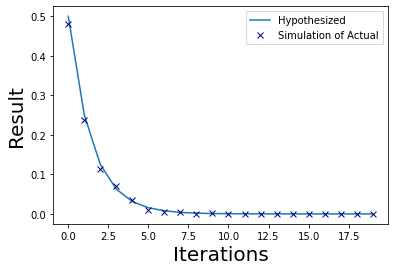

In [8]:
#Verifying that once entered state 2, that over time we will not be in
#this state anymore

def prob(N):
    states = np.arange(1,6,1)
    steps = np.arange(1,N+1,1)
    n=1000
    state_collection = []
    for k in range(n):
        start = 2 
        for i in range(N):
            start = np.random.choice(states,p=trans_matrix[start-1])
        if start==2:
            state_collection.append(1)
        else:
            state_collection.append(0)
    state_collection = np.array(state_collection)
    return state_collection.sum()/n

def p(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = prob(s)
        y.append(v)
    return y

p_20 = p(20)
plt.plot(t(20),label='Hypothesized')
plt.plot(p_20,'x',label='Simulation of Actual',color='navy')
plt.ylabel('Result',fontsize=20)
plt.xlabel('Iterations',fontsize=20)
plt.legend()

[[0.7 0.2 0.1 0.  0. ]]
[[0.49 0.24 0.27 0.   0.  ]]
[[0.343 0.218 0.439 0.    0.   ]]
[[0.2401 0.1776 0.5823 0.     0.    ]]
[[0.16807 0.13682 0.69511 0.      0.     ]]
[[0.117649 0.102024 0.780327 0.       0.      ]]
[[0.0823543 0.0745418 0.8431039 0.        0.       ]]
[[0.05764801 0.05374176 0.88861023 0.         0.        ]]
[[0.04035361 0.03840048 0.92124591 0.         0.        ]]
[[0.02824752 0.02727096 0.94448151 0.         0.        ]]


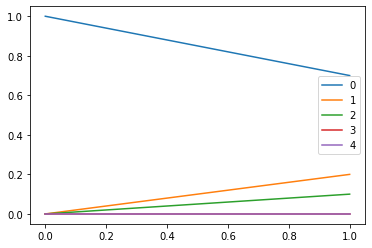

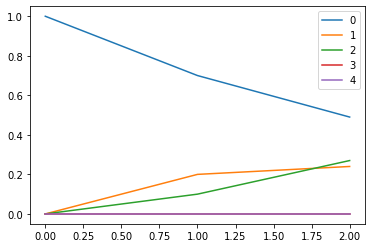

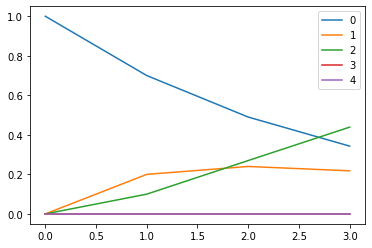

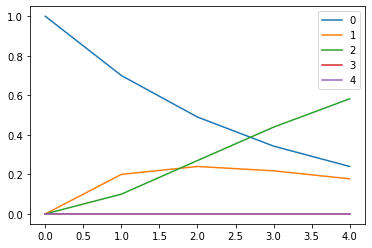

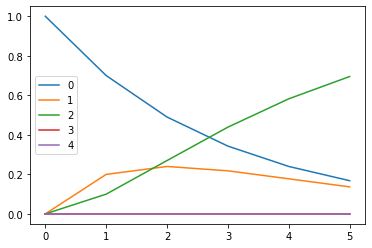

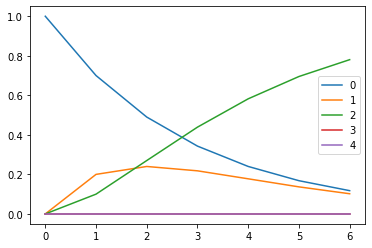

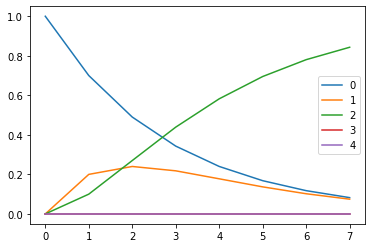

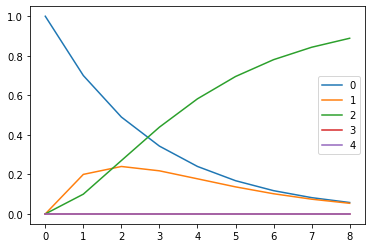

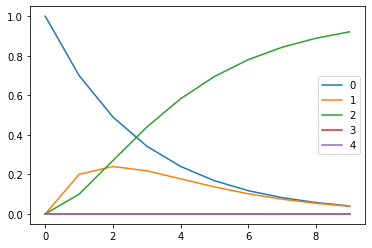

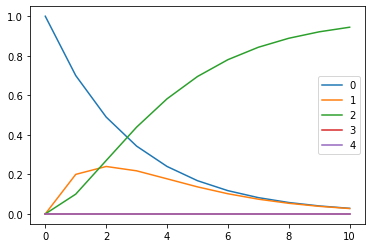

In [9]:
same_trans=trans_matrix
evaluator=np.array([[1.0, 0.0, 0.0, 0.0, 0.0]])

states=evaluator
this = [[0,0,0,0,0]]
for i in range(10):  #can set this value to whatever step size you desire
    evaluator = np.dot(evaluator, same_trans)
    print(evaluator)
    states=np.append(states,evaluator, axis=0)
    this=pd.DataFrame(states)
    this.plot()
    
plt.show()

In [10]:
###############################################################################

'Markov Chain'
'Drink Waiting Times'


################################################################################




'Drink Waiting Times'

In [11]:
import numpy as np  #useful for array and other purposes
import matplotlib.pyplot as plt  #for plotting
import pandas as pd  #for data frames and such
from scipy import signal #other various logic
from scipy import stats #to get distributions and use other fuun funcitons with it
import sklearn  #Ml related library with other useful tools
import seaborn as sns  #graphing related.. more in depth graphs

In [12]:
#There are 3 states in this Markov Chain, ordering, waiting and food arriving

customer_state = ['Currently Ordering','Waiting for Food','Got Food']
states = {'O':customer_state[0],'W':customer_state[1],'D':customer_state[2]}

In [13]:
mean, std = 5,1    #mu is the mean, sigma is the standard deviation of this make believe distribution
def one_customer():
    state_1 = states['O']  #start in ordering state
    order_time = 0.5   #assume 0.5 to be half a minute. This account for how long it takes to order food
    print(state_1+'\n')
    state_2 = states['W']   #now the customer is waiting
    print(state_2+'\n')
    wait_time = 0  #keeping track of wait time
    z = 0
    while z == 0:
        p = stats.norm.cdf(wait_time, loc=mean, scale=std)  #cumulative distirubtion function
        z = np.random.choice([0,1],p = [1-p,p]) #with probailbity p we have gotten food and with probability p-1 we are waiting for it
        wait_time = wait_time+0.5
        if z == 0:
            print('Food is being made \n')
    print('food has arrived \n')
    print(states['D']+'\n')
    print('total wait time is = %.2f'%(wait_time))
    return wait_time

In [14]:
one_customer()

Currently Ordering

Waiting for Food

Food is being made 

Food is being made 

Food is being made 

Food is being made 

Food is being made 

Food is being made 

Food is being made 

Food is being made 

Food is being made 

food has arrived 

Got Food

total wait time is = 5.00


5.0

In [15]:

####################################################################################

'''
One Customer Multiple Items on Menu Example
'''

####################################################################################

'\nOne Customer Multiple Items on Menu Example\n'

In [16]:
pd.read_csv('WaitTimesInRestaurant.csv')

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
...,...,...,...,...,...,...,...
172,Chocolate Smoothie,320,5,53,8,20,170
173,Strawberry Smoothie,300,2,60,7,16,130
174,Ginger Ale,-,-,-,-,-,-
175,Lemon Ale,-,-,-,-,-,-


In [17]:
kind_of_food = np.array(pd.read_csv('WaitTimesInRestaurant.csv')['Unnamed: 0']) ## arrray of all possible items on menu 
prob = []
for i in range(len(kind_of_food)):
    prob.append(np.random.choice(np.arange(50,100))) #50-100 is random but calcualted, you can choose your own

prob = np.array(list(np.array(prob)/sum(prob))) #forming distribution of 174 entries

print(prob)

[0.0040109  0.00590283 0.00628122 0.00408657 0.00378387 0.00560012
 0.00378387 0.00673528 0.0056758  0.00378387 0.00749205 0.00469199
 0.00469199 0.00681096 0.0056758  0.00423793 0.00476767 0.00688664
 0.00635689 0.00681096 0.00673528 0.00378387 0.00681096 0.00385954
 0.0073407  0.00696231 0.00628122 0.00628122 0.00484335 0.00582715
 0.00726502 0.00537309 0.00552444 0.00635689 0.00575148 0.00688664
 0.00484335 0.00469199 0.00544877 0.00590283 0.00544877 0.00597851
 0.00378387 0.00393522 0.00529741 0.00560012 0.00749205 0.00507038
 0.00650825 0.00597851 0.00431361 0.00431361 0.00514606 0.0073407
 0.0066596  0.00688664 0.00612986 0.00597851 0.00544877 0.00476767
 0.00726502 0.00703799 0.00522173 0.00620554 0.00590283 0.00741638
 0.00552444 0.0040109  0.00612986 0.00597851 0.00749205 0.00741638
 0.00378387 0.0073407  0.00650825 0.00711367 0.00408657 0.00560012
 0.00469199 0.0049947  0.00726502 0.00484335 0.00673528 0.00703799
 0.0040109  0.00507038 0.00612986 0.00529741 0.00476767 0.00416

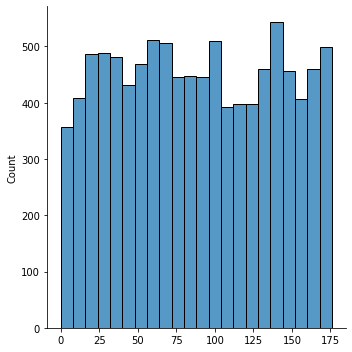

In [18]:
popular_items = []
for i in range(10000):
    popular_items.append(np.random.choice(range(0,len(kind_of_food)),p=prob))
sns.displot(popular_items)

#distribution of popular food items 

In [19]:
#assigning mean value and variance for each item of food and drink. So the probability of selecting that food and the mean and variance alongside it

food_info = pd.DataFrame(kind_of_food,columns=['State 1'])
mean_list = []
var_list = []
for i in range(len(food_info)):
    mean_list.append(np.random.choice(np.linspace(3,6,1000)))
    var_list.append(np.random.choice(np.linspace(0.1,1.5,1000)))
food_info[r'$\mean$']=mean_list
food_info[r'$\std$']=var_list
food_info[r'$p$'] = prob
food_info.head()

,State 1,$\mean$,$\std$,$p$
0,Cool Lime Starbucks Refreshers™ Beverage,4.315315,0.788088,0.004011
1,Ombré Pink Drink,3.576577,0.904404,0.005903
2,Pink Drink,5.924925,1.003904,0.006281
3,Strawberry Acai Starbucks Refreshers™ Beverage,5.543544,0.605906,0.004087
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,5.219219,0.238739,0.003784


In [20]:
#markov chain for choosing a random food item and how long it would take to order and get your drink (given this distribution of items of food)

def multipleItemsAndTimes():
    start = states['O']
    ordering_time = 0.5  #half a minute to order food and drink
    first_state = states['W']
    chosen = np.random.choice(range(0,len(kind_of_food)),p=prob)
    mean, var = food_info[r'$\mean$'].loc[chosen], food_info[r'$\std$'].loc[chosen]
    wait_time = 0
    z = 0
    while z == 0:
        p = stats.norm.cdf(wait_time, loc=mean, scale=var)
        z = np.random.choice([0,1],p = [1-p,p])
        wait_time = wait_time+0.5

    return wait_time
multipleItemsAndTimes()

4.5

Text(0, 0.5, 'Probability Density Function')

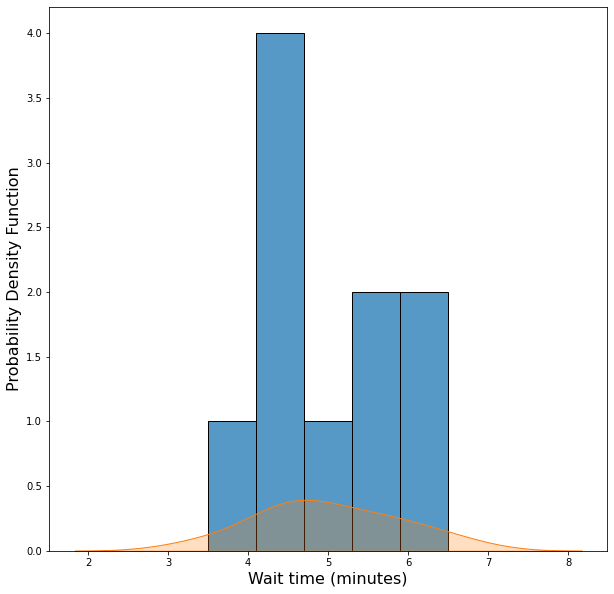

In [21]:
wait_time_list = []
for i in range(10): #10 simulations of this game.. more simulations we run the closer we get to the stationary distribution
    wait_time_list.append(multipleItemsAndTimes())
plt.figure(figsize=(10,10))
sns.histplot(wait_time_list,fill=True)   #histogram plotting of distirubtion for wait time
plt.xlabel('Waiting time (minutes)',fontsize=16)
plt.ylabel('Count',fontsize=16)
sns.kdeplot(wait_time_list,fill=True)  #kernel density plot of disitribution 
plt.xlabel('Wait time (minutes)',fontsize=16)
plt.ylabel('Probability Density Function',fontsize=16)

In [22]:
####################################################################################

'''

Multiple Customers and Multiple Items of Food and Drink


'''

####################################################################################


'\n\nMultiple Customers and Multiple Items of Food and Drink\n\n\n'

In [23]:
#considers many more people than just one person on line.... and it considers having multiple chefs.... 
#this is a random walk, for the random walk it gives you the approximate wait times 

def Random_Food_MultiplePeople(cust=2,num_of_chefs =5):
    q = 0
    order_time = 0
    time = []
    chefs = np.zeros(num_of_chefs)
    for c in range(cust):
        start = states['O']
        order_time+=0.5
        if sum(chefs)!=num_of_chefs:
            waiting_time = multipleItemsAndTimes()
            time.append(waiting_time+order_time)
            chefs[q] = 1
            q = q + 1 
        if len(time)==cust:
            break
        if sum(chefs)==num_of_chefs:
            waiting_time = min(time)+multipleItemsAndTimes()+order_time
            chefs[num_of_chefs-1]=0
            time.append(waiting_time)
            q = q-1
        if len(time)==cust:
            break
    return time

In [26]:
print(Random_Food_MultiplePeople(4,2))
print("These are the wait times for each customer in this random walk.")
print("Ordered from first customer to the last customer.")

[5.0, 5.5, 11.0, 6.0]
These are the wait times for each customer in this random walk.
Ordered from first customer to the last customer.


In [29]:
print(Random_Food_MultiplePeople(10,5))
print("These are the wait times for each customer in this random walk.")
print("Ordered from first customer to the last customer.")

[6.5, 5.0, 6.0, 7.5, 8.0, 11.5, 8.5, 14.5, 10.0, 14.0]
These are the wait times for each customer in this random walk.
Ordered from first customer to the last customer.


Text(0, 0.5, 'Probability Density Function')

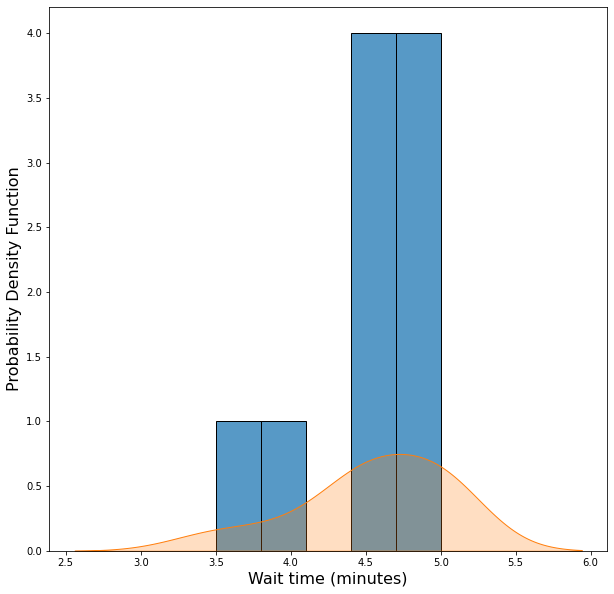

In [151]:
wait_times_stat=[]
for i in range(1000):
    customers = np.random.choice(np.arange(1,20))
    chefs = np.random.choice(np.arange(1,5))
    wait_times_stat.append(Random_Food_MultiplePeople(customers, chefs))
    

plt.figure(figsize=(10,10))
sns.histplot(wait_time_list,fill=True)   #histogram plotting of distirubtion for wait time
plt.xlabel('Waiting time (minutes)',fontsize=16)
plt.ylabel('Count',fontsize=16)
sns.kdeplot(wait_time_list,fill=True)  #kernel density plot of disitribution 
plt.xlabel('Wait time (minutes)',fontsize=16)
plt.ylabel('Probability Density Function',fontsize=16)
